In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df=pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [23]:
df.shape

(8807, 12)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [26]:
df1=df.copy()

In [27]:
df1.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [28]:
df1["country"]=df1["country"].fillna("Unknown")

In [29]:
df1=df1.dropna(subset=['date_added'])

In [30]:
df1=df1.dropna(subset=['rating'])

In [31]:
df1=df1.dropna(subset=['duration'])

In [32]:
df1.isnull().sum()

show_id            0
type               0
title              0
director        2621
cast             825
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [34]:
df1.shape

(8790, 12)

In [38]:
df1.duplicated().sum()

np.int64(0)

In [37]:
df1.duplicated("show_id").sum()

np.int64(0)

In [40]:
df1.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [66]:
df1['date_added'] = pd.to_datetime(df1['date_added'], errors='coerce')
df1 = df1.dropna(subset=['date_added'])

In [46]:
# Extract numbers from duration column and convert to int
df1['duration_num'] = df1['duration'].str.extract('(\d+)').astype(int)

In [47]:
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2


In [48]:
df1.groupby("type")["show_id"].count()

type
Movie      6126
TV Show    2664
Name: show_id, dtype: int64

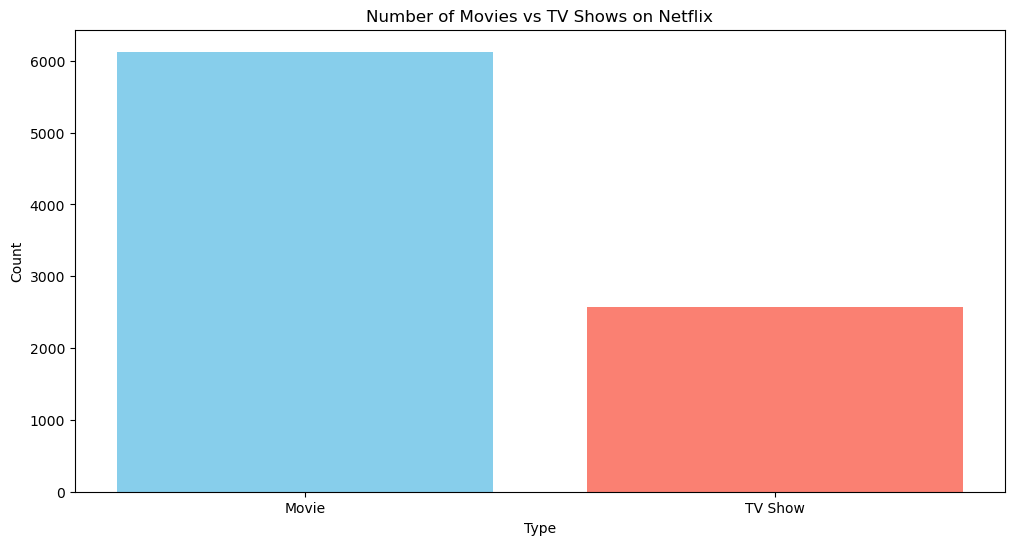

In [67]:
df_type_count = df1.groupby("type")["show_id"].count()

# Plot bar chart
plt.figure(figsize=(12,6))
plt.bar(df_type_count.index, df_type_count.values, color=['skyblue', 'salmon'])

plt.title("Number of Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")

plt.show()


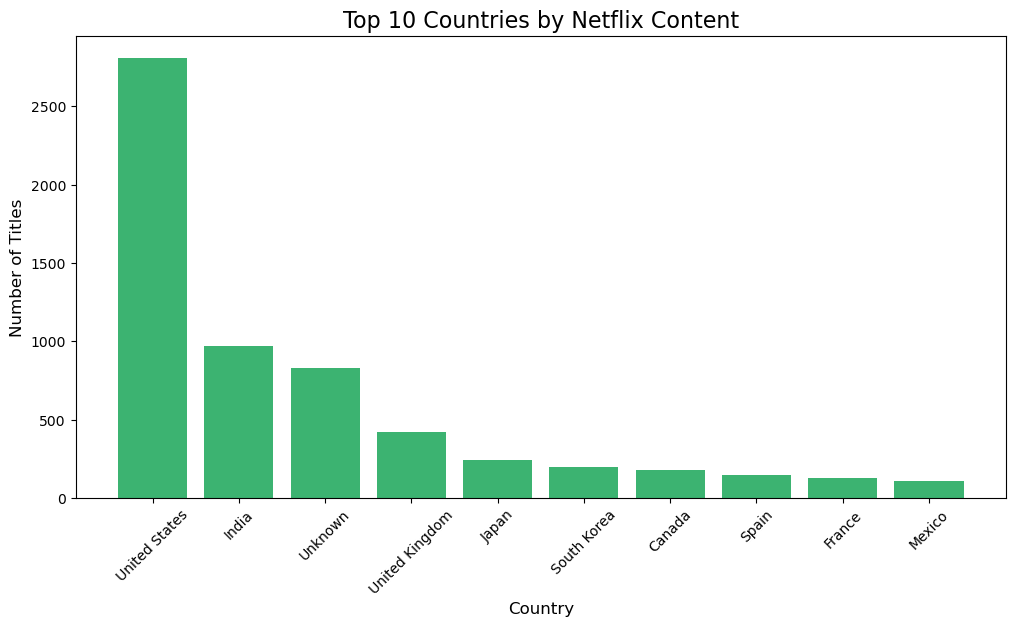

In [60]:
country_counts = df1.groupby('country')['show_id'].count()
top_countries = country_counts.sort_values(ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(12,6))
plt.bar(top_countries.index, top_countries.values, color='mediumseagreen')

plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.title("Top 10 Countries by Netflix Content", fontsize=16)
plt.xticks(rotation=45)  # Rotate x labels for readability

plt.show()


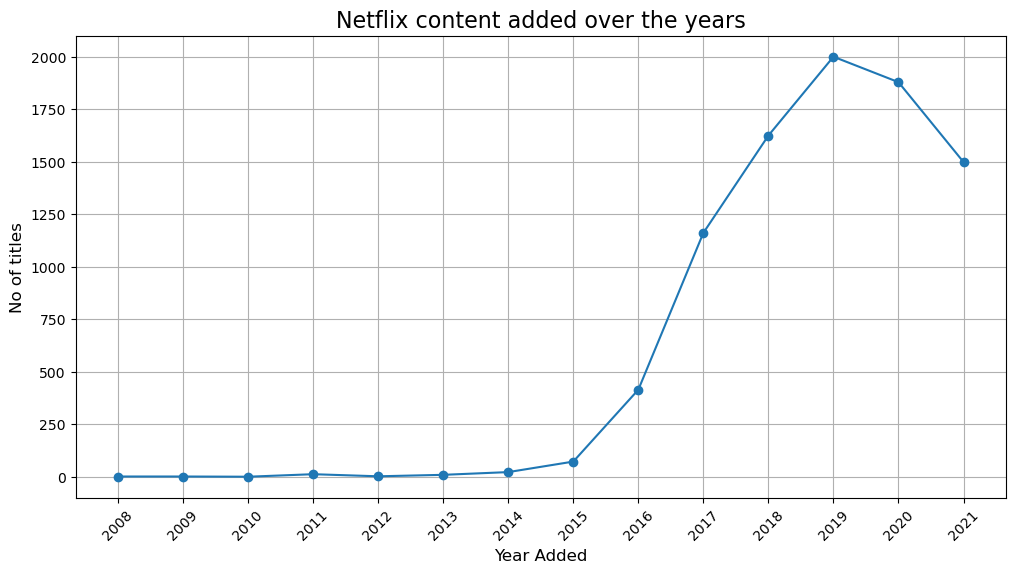

In [71]:
df1['year_added'] = df1['date_added'].dt.year
shows_per_year=df1.groupby('year_added')['show_id'].count()

#plot line chart
plt.figure(figsize=(12,6))
plt.plot(shows_per_year.index,shows_per_year.values,marker='o')

plt.title("Netflix content added over the years",fontsize=16)
plt.xlabel("Year Added",fontsize=12)
plt.ylabel("No of titles",fontsize=12)
plt.grid(True)
plt.xticks(shows_per_year.index, rotation=45)  # Rotate years for readability

plt.show()


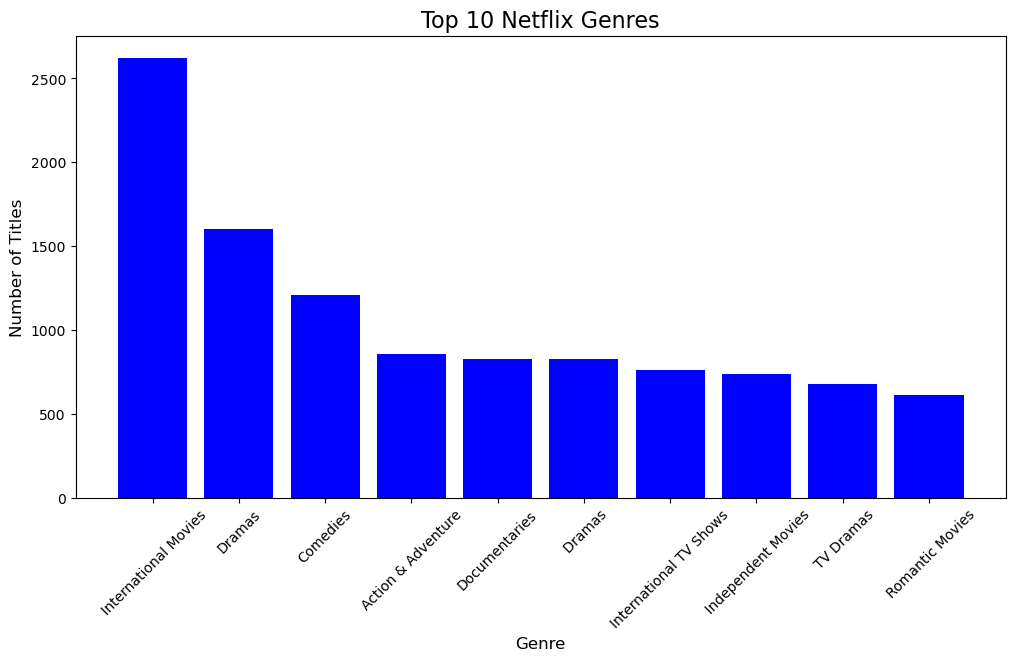

In [75]:
all_genres=df1["listed_in"].str.split(",").explode()
top_genres = all_genres.value_counts().head(10)

plt.figure(figsize=(12,6))
plt.bar(top_genres.index, top_genres.values, color='blue')

plt.xlabel("Genre", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.title("Top 10 Netflix Genres", fontsize=16)
plt.xticks(rotation=45)  # Rotate for readability

plt.show()

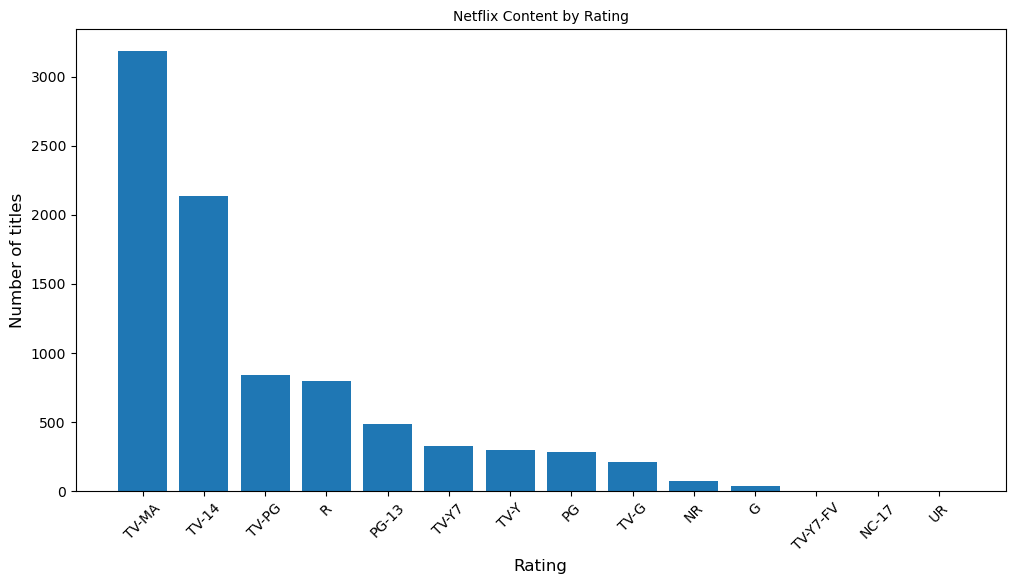

In [77]:
ratings_counts=df1.groupby("rating")["show_id"].count().sort_values(ascending=False)
plt.figure(figsize=(12,6))
plt.bar(ratings_counts.index,ratings_counts.values)
plt.xlabel("Rating",fontsize=12)
plt.ylabel("Number of titles",fontsize=12)
plt.title("Netflix Content by Rating",fontsize=10)
plt.xticks(rotation=45)
plt.show()

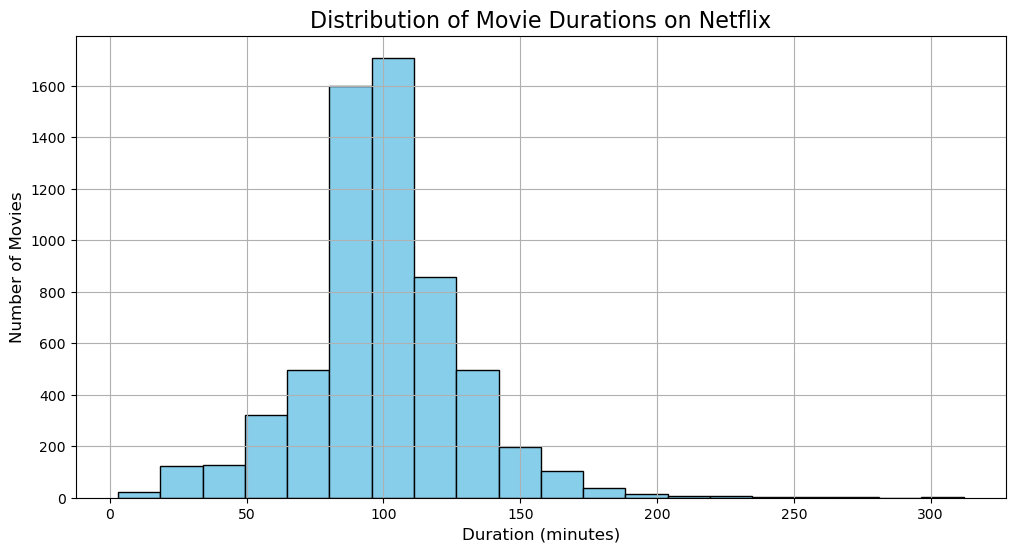

In [78]:
movies = df1[df1['type'] == 'Movie']
plt.figure(figsize=(12,6))
plt.hist(movies['duration_num'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel("Duration (minutes)", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.title("Distribution of Movie Durations on Netflix", fontsize=16)
plt.grid(True)
plt.show()